In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
#Load MNIST dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
#Print shape of train and test sets
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


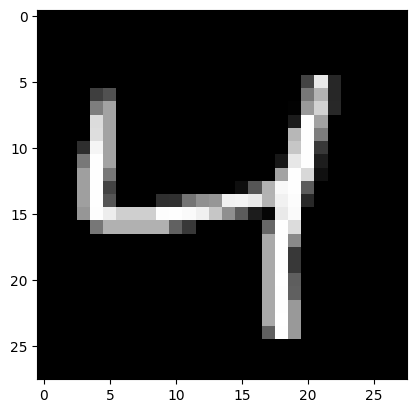

In [5]:
#Plot some images from train and test sets
plt.imshow(x_train[2,:,:],cmap='gray')
plt.show()

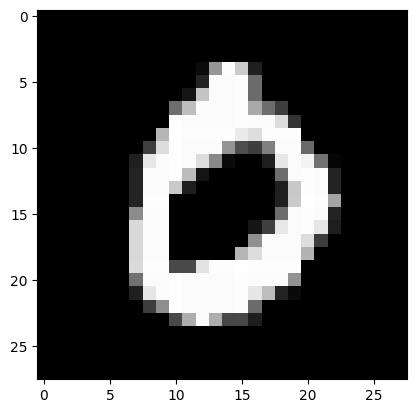

In [6]:
plt.imshow(x_test[3,:,:],cmap='gray')
plt.show()

In [7]:
#Print some labels from train set
print(y_train[2])

4


In [8]:
print(y_train[:50])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


In [9]:
#Create a data frame from labels and count their frequencies
L=pd.DataFrame(y_train)
print(L[0].value_counts())

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64


In [10]:
#Reshape input data to have four dimensions
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [11]:
#Normalize input data
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [12]:
#Convert labels to one-hot vectors
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [14]:
# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters, kernel size (3, 3), and 'relu' activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a MaxPooling2D layer with pool size (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 'relu' activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add another MaxPooling2D layer with pool size (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output before passing to the Dense layer
model.add(Flatten())

# Add a Dense layer with 10 units and 'softmax' activation for classification
model.add(Dense(10, activation='softmax'))

# Print a summary of the model's architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)               

In [15]:
#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
#Train model
model.fit(x_train,y_train,epochs=10,batch_size=256,verbose=1)

Epoch 1/10
235/235 [==============================] - 73s 306ms/step - loss: 0.3925 - accuracy: 0.8930
Epoch 2/10
235/235 [==============================] - 72s 306ms/step - loss: 0.0918 - accuracy: 0.9727
Epoch 3/10
235/235 [==============================] - 78s 331ms/step - loss: 0.0662 - accuracy: 0.9796
Epoch 4/10
235/235 [==============================] - 76s 324ms/step - loss: 0.0522 - accuracy: 0.9841
Epoch 5/10
235/235 [==============================] - 96s 408ms/step - loss: 0.0457 - accuracy: 0.9857
Epoch 6/10
235/235 [==============================] - 54s 231ms/step - loss: 0.0399 - accuracy: 0.9880
Epoch 7/10
235/235 [==============================] - 53s 224ms/step - loss: 0.0362 - accuracy: 0.9889
Epoch 8/10
235/235 [==============================] - 54s 231ms/step - loss: 0.0332 - accuracy: 0.9899
Epoch 9/10
235/235 [==============================] - 51s 218ms/step - loss: 0.0286 - accuracy: 0.9911
Epoch 10/10
235/235 [==============================] - 50s 212ms/step - l

In [17]:
#Evaluate model on test set
loss,acc=model.evaluate(x_test,y_test,verbose=0)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.989
Loss: 0.032


In [18]:
y_predict=model.predict(x_test)

313/313 [==============================] - 4s 14ms/step


In [19]:
y_predict[3]

array([9.9997610e-01, 2.9111470e-11, 6.9505126e-07, 1.9437610e-10,
       1.8568967e-08, 1.6958428e-08, 2.2939581e-05, 3.2407005e-08,
       6.4827645e-08, 1.4377773e-07], dtype=float32)

In [20]:
np.argmax(y_predict[3])

0

In [21]:
y_test=np.argmax(y_test,axis=1)
y_pred=np.argmax(y_predict,axis=1)

In [22]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[ 973    0    2    0    0    0    1    2    2    0]
 [   0 1133    0    1    0    0    1    0    0    0]
 [   1    3 1017    2    1    0    1    3    4    0]
 [   0    0    0 1003    0    3    0    0    4    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   1    0    1    7    0  877    1    2    1    2]
 [   4    2    1    0    2    5  942    0    2    0]
 [   0    4    3    2    0    0    0 1015    1    3]
 [   3    0    2    1    1    1    0    2  962    2]
 [   1    3    0    0    7    4    0    1    1  992]]


In [23]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

